# OptimalQ home assignment

In [1]:
import pandas as pd
import random
import numpy as np

In [2]:
# data = '../data/train'
data = '../data/train_20'
# data = '../data/train_10000'

In [3]:
df = pd.read_csv(data)

### Inspect the data:

In [5]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [7]:
df.ftypes

id                  float64:dense
click                 int64:dense
hour                  int64:dense
C1                    int64:dense
banner_pos            int64:dense
site_id              object:dense
site_domain          object:dense
site_category        object:dense
app_id               object:dense
app_domain           object:dense
app_category         object:dense
device_id            object:dense
device_ip            object:dense
device_model         object:dense
device_type           int64:dense
device_conn_type      int64:dense
C14                   int64:dense
C15                   int64:dense
C16                   int64:dense
C17                   int64:dense
C18                   int64:dense
C19                   int64:dense
C20                   int64:dense
C21                   int64:dense
dtype: object

In [8]:
df.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,8.085792e+06,8.085792e+06,8.085792e+06,8.085792e+06,8.085792e+06,8.085792e+06,8.085792e+06,8.085792e+06,8.085792e+06,8.085792e+06,8.085792e+06,8.085792e+06,8.085792e+06,8.085792e+06,8.085792e+06
mean,9.229435e+18,1.636567e-01,1.410216e+07,1.004987e+03,2.412788e-01,1.019059e+00,2.545521e-01,1.879599e+04,3.182887e+02,5.862288e+01,2.120326e+03,1.318755e+00,1.714950e+02,4.880600e+04,9.424142e+01
std,5.318544e+18,3.699638e-01,4.943827e+01,1.003526e+00,4.546148e-01,4.908343e-01,7.207736e-01,4.667996e+03,2.657754e+01,4.538597e+01,5.708768e+02,1.381888e+00,3.097622e+02,5.004011e+04,6.623489e+01
min,2.052565e+12,0.000000e+00,1.410210e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.300000e+01
25%,4.624138e+18,0.000000e+00,1.410211e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.726400e+04,3.200000e+02,5.000000e+01,1.899000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,4.200000e+01
50%,9.256815e+18,0.000000e+00,1.410212e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.038700e+04,3.200000e+02,5.000000e+01,2.333000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,7.900000e+01
75%,1.381045e+19,0.000000e+00,1.410221e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.176100e+04,3.200000e+02,5.000000e+01,2.503000e+03,3.000000e+00,1.670000e+02,1.000840e+05,1.570000e+02
max,1.844674e+19,1.000000e+00,1.410222e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.201600e+04,1.024000e+03,1.024000e+03,2.536000e+03,3.000000e+00,1.835000e+03,1.002480e+05,2.210000e+02


### Get small amount of the device ids

In [4]:
print('We have {} unique device_id values'.format(len(df['device_id'].unique())))

# let sample 20% from it:
unique_device_ids = df['device_id'].unique()

unique_device_ids_to_take = random.sample(unique_device_ids, int(len(unique_device_ids) * 0.2))

print 'We are taking {} of the devices'.format(len(unique_device_ids_to_take))

filtered = df[df.device_id.isin(unique_device_ids_to_take)]
print 'After filter, we are left with {} rows'.format(len(filtered))


We have 624692 unique device_id values
We are taking 124938 of the devices
After filter, we are left with 6919095 rows


## Check if the data is imbalanced:

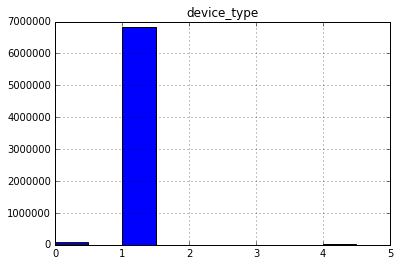

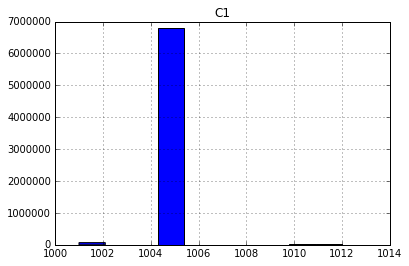

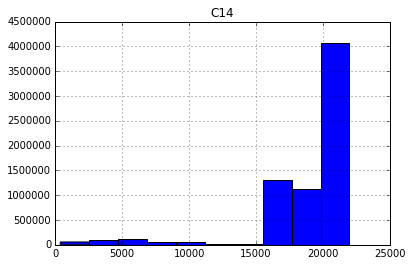

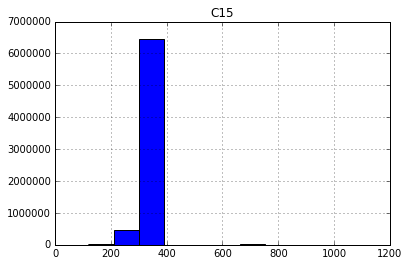

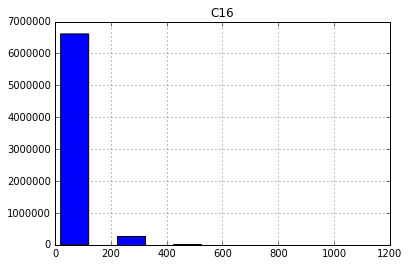

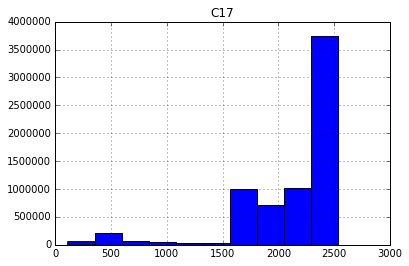

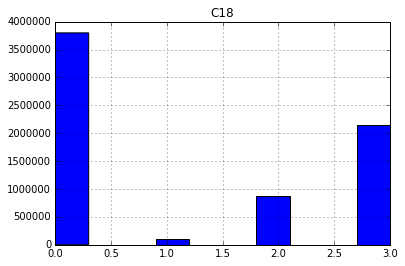

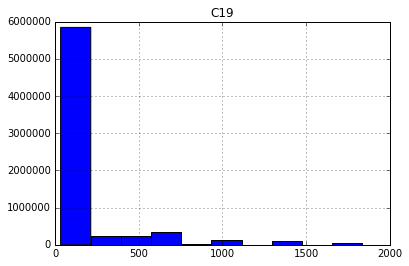

In [12]:
# the data is unbalanced: we have much more devices of type '1' than '0', '4' and '5'
# print filtered['device_type'].value_counts()
# print filtered['C1'].value_counts()
import pylab as P

def create_histogram(data_frame, column_name):
    data_frame[column_name].hist()
    P.title(column_name)
    P.show()
    
create_histogram(data_frame=filtered, column_name='device_type')
create_histogram(data_frame=filtered, column_name='C1')
create_histogram(data_frame=filtered, column_name='C14')
create_histogram(data_frame=filtered, column_name='C15')
create_histogram(data_frame=filtered, column_name='C16')
create_histogram(data_frame=filtered, column_name='C17')
create_histogram(data_frame=filtered, column_name='C18')
create_histogram(data_frame=filtered, column_name='C19')


### 2.a. How balanced is the dataset with respect to the labels?
After checked the several columns, the data seems to be very unbalanced 

## Checking user activity:

In [13]:
filtered['click'].mean()

def count_clicks_mean_by_device(device_type):
    return filtered.loc[filtered['device_type'] == device_type]['click'].mean()
    
print count_clicks_mean_by_device(device_type=0)
print count_clicks_mean_by_device(device_type=1)
print count_clicks_mean_by_device(device_type=4)
print count_clicks_mean_by_device(device_type=5)


0.218909609217
0.163645002695
0.100600282486
0.0811471765229


### 2.b. How active are users? Is this behavior expected?
Seems like ~15.5% of the addes were clicked. This is extremly high number (according to different sources, 3% is already consited extremly high)
We can also see that the the highest click rate have device_id = 0

### Most popular apps:

In [14]:
print 'The 5 most poplutar app domains'
print filtered['app_domain'].value_counts().head(5)

print 'The 5 most popular app categories:'
print filtered['app_category'].value_counts().head(5)

print 'The 5 most poplutar apps'
print filtered['app_id'].value_counts().head(5)

The 5 most poplutar app domains
7801e8d9    4744034
2347f47a    1012171
b8d325c3     197111
d9b5648e     158169
df32afa9     155102
Name: app_domain, dtype: int64
The 5 most popular app categories:
07d7df22    4691059
0f2161f8    1567752
cef3e649     302201
f95efa07     218739
8ded1f7a      96169
Name: app_category, dtype: int64
The 5 most poplutar apps
ecad2386    4672863
a5184c22     195769
e9739828     153467
e96773f0     152722
f0d41ff1     145455
Name: app_id, dtype: int64


## Is there any connection between apps or specific device types to clicks?

In [15]:
# lets's find the devices that most of the click came from:
only_clicked = filtered.loc[filtered['click'] == 1]
print 'Most popular devices'
print filtered['device_type'].value_counts()

print 'Most popular devices that the clicks came from'
print only_clicked['device_type'].value_counts()

# We can see that the ratio similarity between the two most popular devices (1 & 0) and devices with the 
# clicks is more or less the same.
# For places 3 &4 (devices 4 & 5), we can see that there is less chance to get a click if you are using 
# these device

Most popular devices
1    6818925
0      67352
4      28320
5       4498
Name: device_type, dtype: int64
Most popular devices that the clicks came from
1    1115883
0      14744
4       2849
5        365
Name: device_type, dtype: int64


In [16]:
# lets's find the apps that most of the click came from:
print 'Most popular app domain'
print filtered['app_domain'].value_counts().head(5)
print 'Most popular app domain with click'
print only_clicked['app_domain'].value_counts().head(5)

print 'We see that 2347f47a domain to more unlickly to get clicked on (out of top 5)'

print 'Most popular app category'
print filtered['app_category'].value_counts().head(5)
print 'Most popular app category with click'
print only_clicked['app_category'].value_counts().head(5)
print 'We see that there is high chance to get click with 07d7df22, and low with 09481d60 (out of top 5) '

print 'Most popular app id'
print filtered['app_id'].value_counts().head(5)
print 'Most popular app id with click'
print only_clicked['app_id'].value_counts().head(5)
print 'We see that 54c5d545 app is to more unlickly to get clicked on (out of top 5)'


Most popular app domain
7801e8d9    4744034
2347f47a    1012171
b8d325c3     197111
d9b5648e     158169
df32afa9     155102
Name: app_domain, dtype: int64
Most popular app domain with click
7801e8d9    866049
2347f47a    114415
b8d325c3     49303
5c5a694b     22465
6f7ca2ba     19787
Name: app_domain, dtype: int64
We see that 2347f47a domain to more unlickly to get clicked on (out of top 5)
Most popular app category
07d7df22    4691059
0f2161f8    1567752
cef3e649     302201
f95efa07     218739
8ded1f7a      96169
Name: app_category, dtype: int64
Most popular app category with click
07d7df22    861567
0f2161f8    202318
f95efa07     36496
cef3e649     16521
8ded1f7a     11066
Name: app_category, dtype: int64
We see that there is high chance to get click with 07d7df22, and low with 09481d60 (out of top 5) 
Most popular app id
ecad2386    4672863
a5184c22     195769
e9739828     153467
e96773f0     152722
f0d41ff1     145455
Name: app_id, dtype: int64
Most popular app id with click
ecad2

## Predictive model to predict clicks:

In [22]:
from sklearn.model_selection import train_test_split

# filtered['app_id'].astype(int)

def data_train_test_split(columns, target_column):
    X = filtered[columns]
    y = filtered[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    return X_train, X_test, y_train, y_test

columns = ['device_type', 'C1', 'C14','C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
# columns = ['app_id']
X_train, X_test, y_train, y_test = data_train_test_split(columns=columns, target_column='click')

print len(X_train), len(y_train)
print len(X_test), len(y_test)



5189321 5189321
1729774 1729774


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier

logreg = LogisticRegression()
knn = neighbors.KNeighborsClassifier()
# random_forest = RandomForestClassifier(n_jobs=2, random_state=0)


def predict(X_train, X_test, y_train, y_test, algo, metric):
    algo.fit(X_train, y_train)
    predictions = algo.predict(X_test)
    return metric(predictions, y_test)
    

print predict(X_train, X_test, y_train, y_test, algo=logreg, metric=accuracy_score)
    